In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium # plotting library
print('libraries imported')

libraries imported


In [28]:
df = pd.read_csv('03-10-2020.csv')

In [29]:
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000
...,...,...,...,...,...,...,...,...
201,New Mexico,US,2020-03-10T02:33:04,0,0,0,34.8405,-106.2485
202,North Dakota,US,2020-03-10T02:33:04,0,0,0,47.5289,-99.7840
203,South Dakota,US,2020-03-10T02:33:04,0,0,0,44.2998,-99.4388
204,West Virginia,US,2020-03-10T02:33:04,0,0,0,38.4912,-80.9545


# Rename Column

In [30]:
df.rename(columns = {'Country/Region':'Country'}, inplace = True)
df.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000


In [31]:
df.shape
#get sum of null values of each column
df.isnull().sum()

Province/State    107
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64

# Get Percentage of missing values in each column

In [32]:
df.isna().mean().round(4) * 100

Province/State    51.94
Country            0.00
Last Update        0.00
Confirmed          0.00
Deaths             0.00
Recovered          0.00
Latitude           0.00
Longitude          0.00
dtype: float64

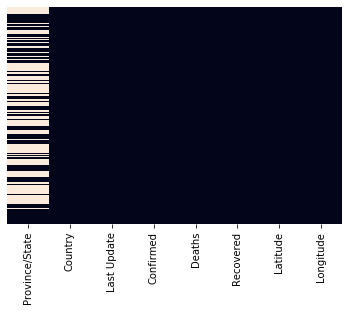

In [33]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [34]:
df_filtered = df[(df.Deaths != 0)]
df_filtered.head(10)

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000
5,NaN,Spain,2020-03-10T23:53:02,1695,35,32,40.0000,-4.0000
6,NaN,Germany,2020-03-10T18:53:02,1457,2,18,51.0000,9.0000
7,Guangdong,Mainland China,2020-03-10T09:13:07,1353,8,1274,23.3417,113.4244
8,Henan,Mainland China,2020-03-08T05:03:02,1272,22,1247,33.8820,113.6140
9,Zhejiang,Mainland China,2020-03-10T10:33:02,1215,1,1191,29.1832,120.0934


In [36]:
aggregations = {
    'Country':'first',
    'Confirmed':'sum',
    'Deaths':'sum',
    'Recovered':'sum',
    'Latitude':'first',
    'Longitude':'first'
}
df_filtered = df_filtered.groupby('Country').agg(aggregations)



In [37]:
df_filtered      = df_filtered.sort_values(by='Deaths', ascending=False)
df_filtered.head()

,Country,Confirmed,Deaths,Recovered,Latitude,Longitude
Country,,,,,,
Mainland China,Mainland China,79899,3136,59258,30.9756,112.2707
Italy,Italy,10149,631,724,43.0000,12.0000
Iran (Islamic Republic of),Iran (Islamic Republic of),8042,291,2731,32.0000,53.0000
Republic of Korea,Republic of Korea,7513,54,247,36.0000,128.0000
Spain,Spain,1695,35,32,40.0000,-4.0000


# Check for null values

In [38]:
df_filtered.isnull().sum()

Country      0
Confirmed    0
Deaths       0
Recovered    0
Latitude     0
Longitude    0
dtype: int64

# Adding percentage columns

In [39]:
df_filtered = df_filtered.assign(Death_Percentage =lambda x: (x['Deaths'] / x['Confirmed'] ) * 100)
df_filtered = df_filtered.assign(Recovery_Percentage =lambda x: (x['Recovered'] / x['Confirmed'] ) * 100)
df_filtered.head(10)


,Country,Confirmed,Deaths,Recovered,Latitude,Longitude,Death_Percentage,Recovery_Percentage
Country,,,,,,,,
Mainland China,Mainland China,79899,3136,59258,30.9756,112.2707,3.924955,74.166135
Italy,Italy,10149,631,724,43.0000,12.0000,6.217361,7.133708
Iran (Islamic Republic of),Iran (Islamic Republic of),8042,291,2731,32.0000,53.0000,3.618503,33.959214
Republic of Korea,Republic of Korea,7513,54,247,36.0000,128.0000,0.718754,3.287635
Spain,Spain,1695,35,32,40.0000,-4.0000,2.064897,1.887906
France,France,1784,33,12,47.0000,2.0000,1.849776,0.672646
US,US,441,28,3,47.4009,-121.4905,6.349206,0.680272
Japan,Japan,581,10,101,36.0000,138.0000,1.721170,17.383821
Iraq,Iraq,71,7,3,33.0000,44.0000,9.859155,4.225352


# Plotting Data

In [60]:
colors=tuple(["g", "b","r","y","k"])

## Order by Death Percentage 

In [61]:
df_deathRate_order      = df_filtered.sort_values(by='Death_Percentage', ascending=False)
df_deathRate_order.head()

,Country,Confirmed,Deaths,Recovered,Latitude,Longitude,Death_Percentage,Recovery_Percentage
Country,,,,,,,,
Morocco,Morocco,3,1,0,31.7917,-7.0926,33.333333,0.000000
Iraq,Iraq,71,7,3,33.0000,44.0000,9.859155,4.225352
US,US,441,28,3,47.4009,-121.4905,6.349206,0.680272
Italy,Italy,10149,631,724,43.0000,12.0000,6.217361,7.133708
Argentina,Argentina,17,1,0,-38.4161,-63.6167,5.882353,0.000000


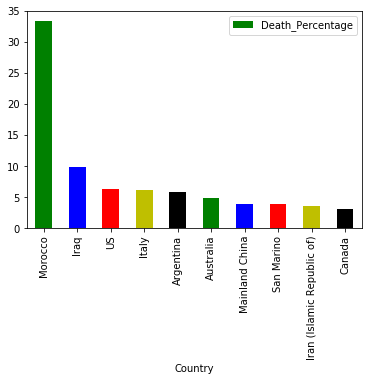

In [62]:
df_deathRate_order.head(10).plot.bar(x = 'Country', y = 'Death_Percentage',color=colors)

# Order by Recovery Percentage

In [42]:
df_recovery_order      = df_filtered.sort_values(by='Recovery_Percentage', ascending=False)
df_recovery_order.head(10)

,Country,Confirmed,Deaths,Recovered,Latitude,Longitude,Death_Percentage,Recovery_Percentage
Country,,,,,,,,
Mainland China,Mainland China,79899,3136,59258,30.9756,112.2707,3.924955,74.166135
Thailand,Thailand,53,1,33,15.8700,100.9925,1.886792,62.264151
Hong Kong SAR,Hong Kong SAR,120,3,65,22.3000,114.2000,2.500000,54.166667
Taipei and environs,Taipei and environs,47,1,17,23.7000,121.0000,2.127660,36.170213
Iran (Islamic Republic of),Iran (Islamic Republic of),8042,291,2731,32.0000,53.0000,3.618503,33.959214
Japan,Japan,581,10,101,36.0000,138.0000,1.721170,17.383821
Canada,Canada,32,1,4,53.7267,-127.6476,3.125000,12.500000
Italy,Italy,10149,631,724,43.0000,12.0000,6.217361,7.133708
Australia,Australia,61,3,4,-33.8688,151.2093,4.918033,6.557377


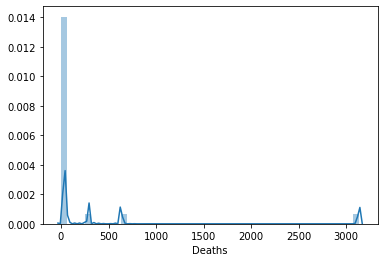

In [43]:
sns.distplot(df_recovery_order.Deaths)

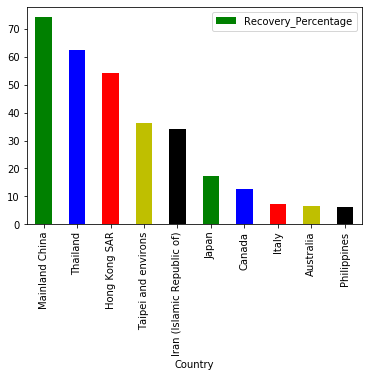

In [58]:

df_recovery_order.head(10).plot(kind='bar',x = 'Country', y = 'Recovery_Percentage',color=)